In [1]:
import sys
import os
path_append = "../"
sys.path.append(path_append)  # Go up one directory from where you are.

In [2]:
import pandas as pd
import seaborn as sns
from plotly import express as px
from matplotlib import pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler


c:\Users\ccn-team\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


- 총 31개의 샘플(혼합물) 제조 후 동일 샘플의 100개의 다른 위치에서 NIR spectrum 습득, 사용되는 원료 또한 100개의 다른 위치에서 NIR spectrum 습득.

- 일반적으로 예측 모델 개발 시에는 NIR spectrum에 전처리 과정을 거침.

- 저희 쪽에서 개발한 예측모델(전처리 수행)과, 인공지능을 통해 개발한 예측모델(Raw 및 전처리 수행한 데이터) 3가지를 모두 비교할 것.

- 즉, Raw와 preprocessed data 모두 예측해봐야 함.

- "Torque" sheet는 혼합물의 혼합 공정 중 습득되는 Torque 값을 정리한 sheet로, 시간(s)에 따른 Torque 값을 나타냄
- Raw, Preprocessing spectrum sheet에 있는 A, B, C, D, E, F는 혼합물이 아니기 때문에 Torque 값이 없음
- "Raw Spectrum" sheet 및 "Preprocessing Spectrum" sheet는 혼합물 및 원료의 NIR spectrum
- "Raw Spectrum" sheet의 데이터는 가공되지 않은 raw 데이터
- "Preprocessing Spectrum" 데이터는 데이터 습득 과정 중 발생하는 노이즈를 줄이기 위해 raw 데이터에 전처리를 수행한 데이터
- 데이터 양 증가를 위해, 동일한 샘플의 다른 위치에서 NIR spectrum을 100번 측정함

# Torque

In [3]:
# 1. C, D, E, F값은 고정, A값과 B값만 바뀜.
# 2. 시간(s)에 따른 Torque값이라 했기에, 셀이 Torque값이라 생각됨.
# 3. 레이블은 A, B, C, D, E, F의 비율.
# ※ Formulation이 무엇인지는 모르겠음.

torque = pd.read_excel("../../data/drug manufacturing/drug.xlsx", sheet_name="Torque")
torque.columns = torque.columns[:7].tolist()+torque.iloc[0,7:].values.tolist()
torque = torque.iloc[1:].reset_index(drop=True)
torque

,Sameple name,A(%),B(%),C(%),D(%),E(%),F(%),0.0,0.005,0.01,...,162.2,162.205,162.21,162.215,162.22,162.225,162.23,162.235,162.24,162.245
0,Run 1,2.43040,61.81960,31.5,2.25,1.0,1.0,0.327,0.320,0.320,...,0.332,0.325,0.326,0.326,0.330,0.330,0.326,0.326,0.324,0.328
1,Run 2,2.49984,61.75016,31.5,2.25,1.0,1.0,0.321,0.322,0.321,...,0.317,0.320,0.313,0.326,0.316,0.324,0.319,0.319,0.322,0.318
2,Run 3,2.56928,61.68072,31.5,2.25,1.0,1.0,0.316,0.318,0.311,...,0.321,0.323,0.316,0.326,0.316,0.319,0.322,0.318,0.323,0.315
3,Run 4,2.63872,61.61128,31.5,2.25,1.0,1.0,0.315,0.320,0.326,...,0.322,0.325,0.318,0.322,0.317,0.324,0.317,0.322,0.324,0.323
4,Run 5,2.70816,61.54184,31.5,2.25,1.0,1.0,0.311,0.320,0.316,...,0.326,0.322,0.325,0.330,0.325,0.317,0.325,0.327,0.322,0.323
5,Run 6,2.77760,61.47240,31.5,2.25,1.0,1.0,0.321,0.313,0.317,...,0.318,0.322,0.318,0.319,0.319,0.319,0.319,0.321,0.314,0.324
6,Run 7,2.84704,61.40296,31.5,2.25,1.0,1.0,0.314,0.311,0.313,...,0.317,0.317,0.319,0.317,0.317,0.318,0.318,0.315,0.318,0.320
7,Run 8,2.91648,61.33352,31.5,2.25,1.0,1.0,0.322,0.317,0.320,...,0.333,0.324,0.326,0.322,0.328,0.324,0.324,0.323,0.323,0.325
8,Run 9,2.98592,61.26408,31.5,2.25,1.0,1.0,0.320,0.314,0.322,...,0.330,0.326,0.322,0.326,0.322,0.328,0.323,0.328,0.327,0.324
9,Run 10,3.05536,61.19464,31.5,2.25,1.0,1.0,0.319,0.321,0.319,...,0.322,0.319,0.329,0.319,0.326,0.321,0.326,0.329,0.321,0.325


# Visualizeation

In [4]:
# 원료의 변화도는 15번째에서 기존 변화도의 2배가 됨. (연구원님의 실수?)

diff = (torque.iloc[1,1] - torque.iloc[0,1]).round(5)
print("normal_diff: ", diff)
for i in range(2, len(torque)):
    now_diff = (torque.iloc[i,1] - torque.iloc[i-1,1]).round(5)
    if diff!=now_diff:
        print(f"abnormal_diff idx: {i}, val: {now_diff}")

fig = px.line(torque.iloc[:,1])
fig.update_layout(width=700, height=500, title=go.layout.Title(text="원료 값"), title_x=0.5, title_font_size = 25)
fig.update_xaxes(title_text="Index")
fig.update_yaxes(title_text="A value")
fig.show()

normal_diff:  0.06944
abnormal_diff idx: 15, val: 0.13888
abnormal_diff idx: 30, val: -1.0416


In [5]:
# Time이 확뛰는 구간이 존재
# 4.995 -> 92.25
# 102.245 -> 122.25
# 132.245 -> 152.25
torque_col_diff = pd.Series(torque.columns[7:]).diff().fillna(0.005)
print(f"normal_time_diff: {torque_col_diff.iloc[1]}")
for i in range(1, len(torque.columns[7:])):
    if torque_col_diff[i].round(3)!=torque_col_diff[0]:
        print(f"abnormal_time_diff idx: {i}, {torque.columns[7+i-1]} -> {torque.columns[7+i]}")
fig = px.line(torque.columns[7:])
fig.update_layout(width=800, height=500, title=go.layout.Title(text="Torque - Time 그래프"), title_x=0.5, title_font_size = 25)
fig.update_xaxes(title_text="Index")
fig.update_yaxes(title_text="Time")
fig.show()

normal_time_diff: 0.005
abnormal_time_diff idx: 1000, 4.995 -> 92.25
abnormal_time_diff idx: 3000, 102.245 -> 122.25
abnormal_time_diff idx: 5000, 132.245 -> 152.25


<Axes: title={'center': 'Run 1'}, xlabel='Time', ylabel='Torque'>

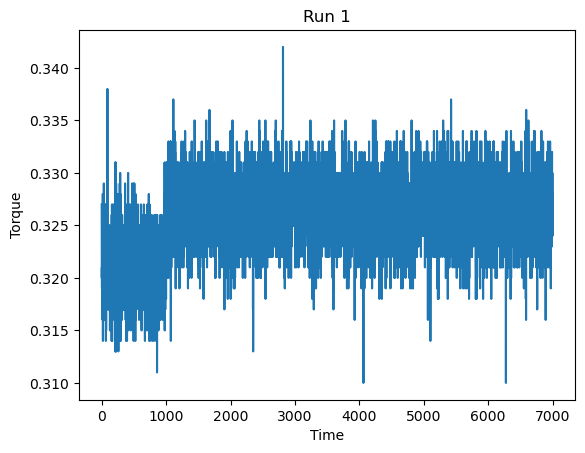

In [6]:
plt.xlabel("Time")
plt.ylabel("Torque")
plt.title("Run 1")
sns.lineplot(data = torque.iloc[0,7:].values)

<Axes: title={'center': 'Run 2'}, xlabel='Time', ylabel='Torque'>

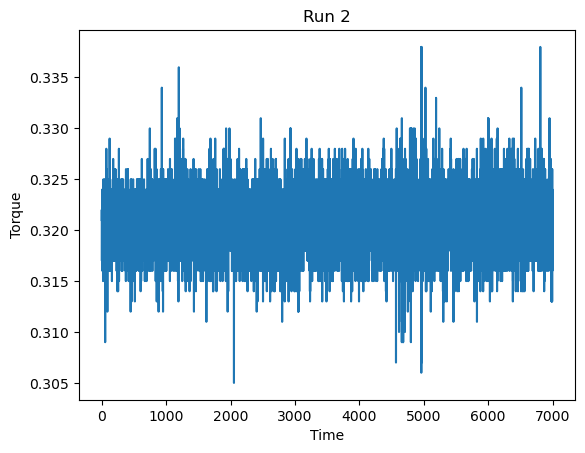

In [7]:
plt.xlabel("Time")
plt.ylabel("Torque")
plt.title("Run 2")
sns.lineplot(data = torque.iloc[1,7:].values)

<Axes: title={'center': 'Run 3'}, xlabel='Time', ylabel='Torque'>

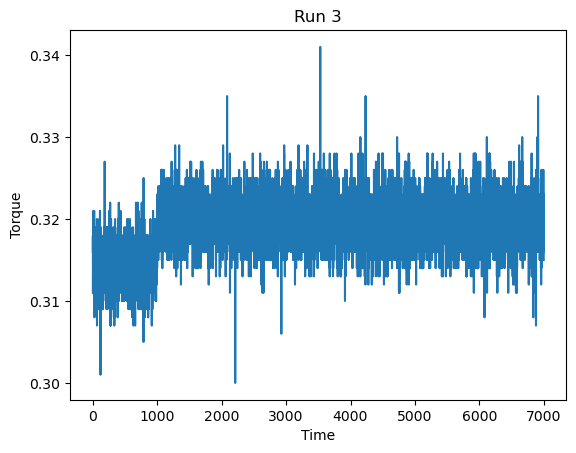

In [8]:
plt.xlabel("Time")
plt.ylabel("Torque")
plt.title("Run 3")
sns.lineplot(data = torque.iloc[2,7:].values)

# RAW

In [9]:
# 각 혼합물 & 원료100% 에 대해 100번씩 찍어봄. -> (31 + 6)*100 = 3700
raw = pd.read_excel("../../data/drug manufacturing/drug.xlsx", sheet_name="Raw Spectrum")
raw = raw.set_index("Sample name")
raw.columns = raw.columns[:6].tolist()+raw.iloc[0,6:].values.tolist()
raw = raw.iloc[1:]
raw

,A(%),B(%),C(%),D(%),E(%),F(%),4736.82412109375,4744.53881835938,4752.253515625,4759.96821289063,...,5932.60219726563,5940.31689453125,5948.03159179687,5955.7462890625,5963.46098632812,5971.17568359375,5978.89038085938,5986.605078125,5994.31977539063,6002.03447265625
Sample name,,,,,,,,,,,,,,,,,,,,,
Run01_1,2.4304,61.8196,31.5,2.25,1.0,1.0,0.595625,0.594963,0.593775,0.592429,...,0.290442,0.289701,0.289275,0.288955,0.288600,0.287968,0.287336,0.287404,0.288196,0.288837
Run01_2,2.4304,61.8196,31.5,2.25,1.0,1.0,0.666036,0.665710,0.664952,0.663161,...,0.341719,0.341113,0.340717,0.340311,0.339871,0.339152,0.338558,0.338827,0.339851,0.340655
Run01_3,2.4304,61.8196,31.5,2.25,1.0,1.0,0.476241,0.476290,0.475239,0.473548,...,0.200643,0.200053,0.199585,0.199125,0.198731,0.198239,0.197761,0.197833,0.198601,0.199246
Run01_4,2.4304,61.8196,31.5,2.25,1.0,1.0,0.668882,0.668593,0.667606,0.665640,...,0.353836,0.353068,0.352462,0.351932,0.351410,0.350691,0.350131,0.350335,0.351205,0.351855
Run01_5,2.4304,61.8196,31.5,2.25,1.0,1.0,0.631540,0.631593,0.630481,0.628587,...,0.312428,0.311782,0.311314,0.310829,0.310340,0.309671,0.309045,0.309068,0.309870,0.310664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_96,0.0000,0.0000,0.0,0.00,0.0,100.0,0.137963,0.141466,0.143618,0.143244,...,0.102847,0.103975,0.105095,0.105961,0.106088,0.105196,0.103523,0.101359,0.099198,0.097825
F_97,0.0000,0.0000,0.0,0.00,0.0,100.0,0.411240,0.408607,0.405413,0.402167,...,0.306883,0.305356,0.303475,0.301621,0.299818,0.297955,0.296220,0.294596,0.292937,0.291349
F_98,0.0000,0.0000,0.0,0.00,0.0,100.0,0.340023,0.334706,0.328719,0.323118,...,0.240007,0.237060,0.234011,0.231140,0.228248,0.225024,0.221586,0.218268,0.215288,0.212641


In [10]:
# NIR spectrum에서 파장차이는 거의 균일하나, 완전히 같지는 않음.
print((raw.columns[7] - raw.columns[6]))
print((raw.columns[8] - raw.columns[7]))
print((raw.columns[9] - raw.columns[8]))
fig = go.Figure()
fig.update_layout(width=1000, height=500, title=go.layout.Title(text="파장 그래프"), title_x=0.5, title_font_size = 25)
fig.update_xaxes(title_text="Index")
fig.update_yaxes(title_text="Wavenumber (1/cm)")
fig.add_trace(go.Scatter(y=raw.columns[6:], name="Columns"))
fig.show()

7.714697265629184
7.714697265620089
7.714697265630093


In [11]:
# NIR 파장에 대한 스펙트럼 시각화
fig = go.Figure()
fig.update_layout(width=1000, height=500, title=go.layout.Title(text="Run별 검출값 그래프"), title_x=0.5, title_font_size = 25)
fig.update_xaxes(title_text="Wavenumber (1/cm)")
fig.update_yaxes(title_text="Value")
for i in range(3):
    fig.add_trace(go.Scatter(x=raw.iloc[i,6:].index, y=raw.iloc[i,6:].values, name=raw.index[i]))
fig.show()

# Preprocessed

In [12]:
# raw 엑셀을 전처리한 것.
prep = pd.read_excel("../../data/drug manufacturing/drug.xlsx", sheet_name="Preprocessing Spectrum")
prep = prep.set_index("Sample name")
prep.columns = prep.columns[:7].tolist()+prep.iloc[0,7:].values.tolist()
prep = prep.iloc[1:]
prep

,A(%),B(%),C(%),D(%),E(%),F(%),Wavenumber (1/cm),4744.53881835938,4752.253515625,4759.96821289063,...,5932.60219726563,5940.31689453125,5948.03159179687,5955.7462890625,5963.46098632812,5971.17568359375,5978.89038085938,5986.605078125,5994.31977539063,6002.03447265625
Sample name,,,,,,,,,,,,,,,,,,,,,
Run01_1,2.4304,61.8196,31.5,2.25,1.0,1.0,-1.737890,-1.738660,-1.740170,-1.740970,...,-1.764540,-1.764440,-1.764890,-1.762430,-1.761680,-1.764170,-1.765620,-1.765160,-1.765700,-1.768440
Run01_2,2.4304,61.8196,31.5,2.25,1.0,1.0,-2.315620,-2.315560,-2.316030,-2.316110,...,-2.284550,-2.282840,-2.284700,-2.283750,-2.280370,-2.279220,-2.281130,-2.283550,-2.285030,-2.286570
Run01_3,2.4304,61.8196,31.5,2.25,1.0,1.0,-3.512990,-3.513140,-3.513890,-3.513950,...,-3.462560,-3.462320,-3.465950,-3.465820,-3.461660,-3.460640,-3.462750,-3.464210,-3.464370,-3.465390
Run01_4,2.4304,61.8196,31.5,2.25,1.0,1.0,-4.082130,-4.081020,-4.079980,-4.078820,...,-3.924270,-3.923430,-3.926870,-3.925730,-3.919940,-3.918770,-3.920510,-3.921500,-3.921660,-3.921180
Run01_5,2.4304,61.8196,31.5,2.25,1.0,1.0,-2.933300,-2.932420,-2.931360,-2.930910,...,-2.790960,-2.789480,-2.792380,-2.792930,-2.788410,-2.786580,-2.787300,-2.787390,-2.785750,-2.784070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_96,0.0000,0.0000,0.0,0.00,0.0,100.0,-0.001330,0.001720,0.002319,0.003884,...,0.172153,0.176713,0.179713,0.178604,0.177173,0.179134,0.180011,0.179403,0.180363,0.182755
F_97,0.0000,0.0000,0.0,0.00,0.0,100.0,0.603917,0.607446,0.608513,0.611066,...,0.782482,0.784989,0.789657,0.790892,0.788208,0.787101,0.789185,0.791486,0.792805,0.794250
F_98,0.0000,0.0000,0.0,0.00,0.0,100.0,0.954953,0.956262,0.956334,0.957919,...,0.986205,0.984892,0.986516,0.989677,0.988423,0.985180,0.984939,0.986336,0.988259,0.989158


In [13]:
# NIR 파장에 대한 스펙트럼 시각화
import plotly.graph_objects as go
fig = go.Figure()
fig.update_layout(width=1000, height=500, title=go.layout.Title(text="Run별 검출값 그래프"), title_x=0.5, title_font_size = 25)
fig.update_xaxes(title_text="Wavenumber (1/cm)")
fig.update_yaxes(title_text="Value")
for i in range(3):
    fig.add_trace(go.Scatter(x=prep.iloc[i,7:].index, y=prep.iloc[i,7:].values, name=prep.columns[i]))
fig.show()

# 전처리

## 1) raw

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

raw = pd.read_excel("../../data/drug manufacturing/drug.xlsx", sheet_name="Raw Spectrum")
raw = raw.set_index("Sample name")
raw.columns = raw.columns[:6].tolist()+raw.iloc[0,6:].values.tolist()
raw = raw.iloc[1:]
X = raw.iloc[:, 6:]
y = raw.iloc[:, :6]
raw

,A(%),B(%),C(%),D(%),E(%),F(%),4736.82412109375,4744.53881835938,4752.253515625,4759.96821289063,...,5932.60219726563,5940.31689453125,5948.03159179687,5955.7462890625,5963.46098632812,5971.17568359375,5978.89038085938,5986.605078125,5994.31977539063,6002.03447265625
Sample name,,,,,,,,,,,,,,,,,,,,,
Run01_1,2.4304,61.8196,31.5,2.25,1.0,1.0,0.595625,0.594963,0.593775,0.592429,...,0.290442,0.289701,0.289275,0.288955,0.288600,0.287968,0.287336,0.287404,0.288196,0.288837
Run01_2,2.4304,61.8196,31.5,2.25,1.0,1.0,0.666036,0.665710,0.664952,0.663161,...,0.341719,0.341113,0.340717,0.340311,0.339871,0.339152,0.338558,0.338827,0.339851,0.340655
Run01_3,2.4304,61.8196,31.5,2.25,1.0,1.0,0.476241,0.476290,0.475239,0.473548,...,0.200643,0.200053,0.199585,0.199125,0.198731,0.198239,0.197761,0.197833,0.198601,0.199246
Run01_4,2.4304,61.8196,31.5,2.25,1.0,1.0,0.668882,0.668593,0.667606,0.665640,...,0.353836,0.353068,0.352462,0.351932,0.351410,0.350691,0.350131,0.350335,0.351205,0.351855
Run01_5,2.4304,61.8196,31.5,2.25,1.0,1.0,0.631540,0.631593,0.630481,0.628587,...,0.312428,0.311782,0.311314,0.310829,0.310340,0.309671,0.309045,0.309068,0.309870,0.310664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_96,0.0000,0.0000,0.0,0.00,0.0,100.0,0.137963,0.141466,0.143618,0.143244,...,0.102847,0.103975,0.105095,0.105961,0.106088,0.105196,0.103523,0.101359,0.099198,0.097825
F_97,0.0000,0.0000,0.0,0.00,0.0,100.0,0.411240,0.408607,0.405413,0.402167,...,0.306883,0.305356,0.303475,0.301621,0.299818,0.297955,0.296220,0.294596,0.292937,0.291349
F_98,0.0000,0.0000,0.0,0.00,0.0,100.0,0.340023,0.334706,0.328719,0.323118,...,0.240007,0.237060,0.234011,0.231140,0.228248,0.225024,0.221586,0.218268,0.215288,0.212641


### 옵션 : 특성선택

- 분산임계법

# 분산임계: 분산이 임계값보다 작으면 예측이 도움이 안될 것이라고 가정하고 특성 선택 

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.025)
print(selector.fit_transform(X).shape)
# print(selector.variances_)
print(selector.get_support())


- 재귀특성제거

# 재귀 특성 제거: ML모델 자체가 계산하는 특성 중요도를 통해 중요도가 가장 낮은 feature들 제거
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 모델 설정
model = LinearRegression()

# RFE를 사용하여 재귀적 특성 제거 수행
rfe = RFE(estimator=model, n_features_to_select=1)  # 선택할 특성 개수 설정 (개수 설정 필요)
X_selected = rfe.fit_transform(X, y)
print(rfe.ranking_)
print(rfe.support_)

- 전방탐색법

# 전방탐색법 : feature subset은 처음에 모든 feature를 가진채 탐색을 시작
#             주어진 ML 모델에서의 교차 검증을 통해 매 단계에서 제거했을 때 가장 좋은 성능을 보여주는 feature를 feature subset에서 제거
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor

# estimator
knn = KNeighborsRegressor(n_neighbors=3)

selector = SequentialFeatureSelector(knn, n_features_to_select=10, direction='forward')
selector.fit_transform(X, y).shape

selector.get_support()

### 옵션: 분포변화

- 정규분포화

from sklearn.preprocessing import QuantileTransformer
trans = QuantileTransformer(output_distribution='normal')
tmp = raw.iloc[:,7]
sns.histplot(tmp)
sns.histplot(trans.fit_transform(tmp.values.reshape(-1,1)))

- 균일화

from sklearn.preprocessing import QuantileTransformer
trans = QuantileTransformer(output_distribution='uniform')
tmp = raw.iloc[:,7]
sns.histplot(tmp)
sns.histplot(trans.fit_transform(tmp.values.reshape(-1,1)))

### 옵션: 차원 축소

- PCA(주성분 분석)

# 데이터셋의 분산이 최대가 되도록 하는 주성분(Principal Component)을 찾아 이를 사용
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca = pca.fit_transform(raw.iloc[:,7:])
print(pca.shape)
print(pca)

- LDA

In [15]:
# # 문서를 자신이 지정한 K개 주제중 하나로 분류
# from sklearn.decomposition import LatentDirichletAllocation

# lda = LatentDirichletAllocation(n_components=50)
# lda = lda.fit_transform(raw.iloc[:,7:])
# print(lda.shape)
# print(lda)

# 전처리

In [16]:
raw = pd.read_excel("../../data/drug manufacturing/drug.xlsx", sheet_name="Raw Spectrum")
# Sample name 제거
raw = raw.set_index("Sample name")
raw.columns = raw.columns[:6].tolist()+raw.iloc[0,6:].values.tolist()
raw = raw.iloc[1:]

# 레이블 비율 0~1로 맞추기
raw.iloc[:, :6]/=100

# 0~1 정규화
mm = MinMaxScaler()
raw.iloc[6:] = mm.fit_transform(raw.iloc[6:].values)
    
raw

,A(%),B(%),C(%),D(%),E(%),F(%),4736.82412109375,4744.53881835938,4752.253515625,4759.96821289063,...,5932.60219726563,5940.31689453125,5948.03159179687,5955.7462890625,5963.46098632812,5971.17568359375,5978.89038085938,5986.605078125,5994.31977539063,6002.03447265625
Sample name,,,,,,,,,,,,,,,,,,,,,
Run01_1,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.595625,0.594963,0.593775,0.592429,...,0.290442,0.289701,0.289275,0.288955,0.288600,0.287968,0.287336,0.287404,0.288196,0.288837
Run01_2,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.666036,0.665710,0.664952,0.663161,...,0.341719,0.341113,0.340717,0.340311,0.339871,0.339152,0.338558,0.338827,0.339851,0.340655
Run01_3,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.476241,0.476290,0.475239,0.473548,...,0.200643,0.200053,0.199585,0.199125,0.198731,0.198239,0.197761,0.197833,0.198601,0.199246
Run01_4,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.668882,0.668593,0.667606,0.665640,...,0.353836,0.353068,0.352462,0.351932,0.351410,0.350691,0.350131,0.350335,0.351205,0.351855
Run01_5,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.631540,0.631593,0.630481,0.628587,...,0.312428,0.311782,0.311314,0.310829,0.310340,0.309671,0.309045,0.309068,0.309870,0.310664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_96,0.000000,0.000000,0.000,0.0000,0.00,1.00,0.240117,0.245025,0.248597,0.249122,...,0.320803,0.326225,0.330968,0.334839,0.337300,0.338098,0.337526,0.335942,0.332448,0.329165
F_97,0.000000,0.000000,0.000,0.0000,0.00,1.00,0.519379,0.518813,0.518102,0.516912,...,0.623924,0.624877,0.624967,0.624731,0.624259,0.623597,0.623035,0.622439,0.618555,0.613474
F_98,0.000000,0.000000,0.000,0.0000,0.00,1.00,0.446603,0.443073,0.439149,0.435156,...,0.524571,0.523593,0.522022,0.520307,0.518247,0.515578,0.512454,0.509273,0.503887,0.497843


In [17]:
fig = go.Figure()
fig.update_layout(width=1000, height=500, title=go.layout.Title(text="Run별 검출값 그래프"), title_x=0.5, title_font_size = 25)
fig.update_xaxes(title_text="Wavenumber (1/cm)")
fig.update_yaxes(title_text="Value")
for i in range(3):
    fig.add_trace(go.Scatter(x=raw.iloc[i,6:].index, y=raw.iloc[i,6:].values, name=raw.index[i]))
fig.show()

# 결론

In [18]:
'''
    - 테스크 개요
    : raw 및 preprocessed 엑셀을 통해 합성물의 합성비를 맞추는 것.
    ※ Multivariate, Multiple



    - 데이터 개요
        1) Torque : 합성물들의 시간에 따른 Torque값
            ● shape : 31, 7007(6+7001)
            ● 범주형 컬럼 : 없음.
            ● 수치형 컬럼 : 
            ● 레이블 : A, B, C, D, E, F 비율.
            
            ● ※ 학습에 사용하지 않아도 될 것으로 보임.

        2) raw : 합성물들의 파장에 따른 검출 값 원본.
            ● shape : 3700((31+6)*100), 171
            ● 범주형 컬럼 : 없음.
            ● 수치형 컬럼 : 
            ● 레이블 : A, B, C, D, E, F 비율.

        3) prep : raw 파일을 전처리한 것.
            raw와 동일.

    - 특이사항 
        1) Torque
            ● 원료의 비율 변화도가 중간에 2배가 됨.
            ● Time이 일정하게 증가하다가 급변하는 구간 존재

        2) raw & prep
            ● 그래프상에서 raw는 기존 혼합물의 특성이 살아있지만, prep은 이러한 특징이 살아있는지 의문.

            
    - 전처리
        1) 레이블: 6개 레이블 합이 1이 되도록 100으로 나눔
        2) X 정규화: 전체 X 에 대해서 Minmax 정규화 진행

    - 옵션
        1) 특성 선택
            ● 분산 임계: 임계값보다 높은 분산을 가지는 특성만 선택. 
                        X만을 사용하는 방법
                        0.025일때 27개 특성 선택됨.
            ● 재귀 특성 제거: ML모델 자체가 계산하는 특성 중요도를 통해 중요도가 가장 낮은 feature들 제거
            ● 전방탐색법: feature subset이 비어있는 상태에서 탐색을 시작한다. 
                         주어진 ML 모델에서의 교차 검증을 통해 매 단계에서 추가했을 때 가장 좋은 성능을 보여주는 feature를 하나씩 feature subset에 추가해간다.
                         특성 개수 많으면 오래걸림
        
        2) 분포변화
            ● 정규분포화
            ● 균일분포화

        3) 특성공학 - 차원축소
            ● 주성분분석 (PCA) : 문서를 자신이 지정한 K개 주제중 하나로 분류
            ● 잠재 디리클레 할당 (LDA) : 데이터셋의 분산이 최대가 되도록 하는 주성분(Principal Component)을 찾아 이를 사용
'''

'\n    - 테스크 개요\n    : raw 및 preprocessed 엑셀을 통해 합성물의 합성비를 맞추는 것.\n    ※ Multivariate, Multiple\n\n\n\n    - 데이터 개요\n        1) Torque : 합성물들의 시간에 따른 Torque값\n            ● shape : 31, 7007(6+7001)\n            ● 범주형 컬럼 : 없음.\n            ● 수치형 컬럼 : \n            ● 레이블 : A, B, C, D, E, F 비율.\n            \n            ● ※ 학습에 사용하지 않아도 될 것으로 보임.\n\n        2) raw : 합성물들의 파장에 따른 검출 값 원본.\n            ● shape : 3700((31+6)*100), 171\n            ● 범주형 컬럼 : 없음.\n            ● 수치형 컬럼 : \n            ● 레이블 : A, B, C, D, E, F 비율.\n\n        3) prep : raw 파일을 전처리한 것.\n            raw와 동일.\n\n    - 특이사항 \n        1) Torque\n            ● 원료의 비율 변화도가 중간에 2배가 됨.\n            ● Time이 일정하게 증가하다가 급변하는 구간 존재\n\n        2) raw & prep\n            ● 그래프상에서 raw는 기존 혼합물의 특성이 살아있지만, prep은 이러한 특징이 살아있는지 의문.\n\n            \n    - 전처리\n        1) 레이블: 6개 레이블 합이 1이 되도록 100으로 나눔\n        2) X 정규화: 전체 X 에 대해서 Minmax 정규화 진행\n\n    - 옵션\n        1) 특성 선택\n            ● 분산 임계: 임계값보다 높은 분산을 가지는 특성만 선택. \n         

# DataLoader


In [19]:
import torch
from sklearn.model_selection import train_test_split 

In [20]:

# https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_7_DeepLearning/FeedForwardNeuralNetworks.html
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        vals = torch.tensor(self.x[index], dtype = torch.float32).unsqueeze(0)
        label = torch.tensor(self.y[index], dtype= torch.float32).unsqueeze(0)
        # label = torch.tensor(self.y[index], dtype= torch.float32).unsqueeze(-1)
        return vals, label


In [21]:
y = raw.iloc[:,:6]
X = raw.iloc[:,6:]

In [22]:
import numpy as np
# total length of the data
total_length = 3700
mixture_length = 3700

# generate test indices
test_indices = np.hstack([np.arange(start, start+100) for start in range(0, mixture_length, 400)])

# generate all indices
all_indices = np.arange(total_length)

# get train indices by finding the difference between all indices and test indices
train_indices = np.setdiff1d(all_indices, test_indices)

# separate your data into training and testing based on the indices
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]


print("----------------------------X_train, X_test SHAPE----------------------------")
print(X_train.shape, X_test.shape)
print("----------------------------y_train_oversampled, y_train, y_test DISTRIBUTION----------------------------")
print(y_train.value_counts()/len(y_train)*100)
print(y_test.value_counts()/len(y_test)*100)    

----------------------------X_train, X_test SHAPE----------------------------
(2700, 165) (1000, 165)
----------------------------y_train_oversampled, y_train, y_test DISTRIBUTION----------------------------
A(%)      B(%)      C(%)   D(%)    E(%)  F(%)
0.000000  0.000000  0.000  0.0000  1.00  0.00    3.703704
                           1.0000  0.00  0.00    3.703704
0.045136  0.597364  0.315  0.0225  0.01  0.01    3.703704
0.043747  0.598753  0.315  0.0225  0.01  0.01    3.703704
0.043053  0.599447  0.315  0.0225  0.01  0.01    3.703704
0.042358  0.600142  0.315  0.0225  0.01  0.01    3.703704
0.040970  0.601530  0.315  0.0225  0.01  0.01    3.703704
0.040275  0.602225  0.315  0.0225  0.01  0.01    3.703704
0.039581  0.602919  0.315  0.0225  0.01  0.01    3.703704
0.038192  0.604308  0.315  0.0225  0.01  0.01    3.703704
0.037498  0.605002  0.315  0.0225  0.01  0.01    3.703704
0.036803  0.605697  0.315  0.0225  0.01  0.01    3.703704
0.035414  0.607086  0.315  0.0225  0.01  0.01    3

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, shuffle= False)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [24]:
X_train = X_train.iloc[:, :].values 
X_test = X_test.iloc[:, :].values 
y_train = y_train.values
y_test = y_test.values

# Generate trainset, testset, train_generator, tsest_generator
trainset = Dataset(X_train, y_train)
testset = Dataset(X_test, y_test)

# Training

In [25]:
from tools.setting.data_config import DataConfig
from tools.setting.ml_params import MLParameters
from trainer_hub import TrainerHub

data_config = DataConfig(dataset_name = 'drug_manu', task_type='regression', obs_shape=[165], label_size=6)

#  Set training configuration from the AlgorithmConfig class, returning them as a Namespace object.
ml_params = MLParameters(core_model = 'gpt', encoder_model = 'none')

ml_params.num_epoch = 1000
ml_params.model.core_config.dropout = 0.0
ml_params.optimization.decay_rate_100k = 0.01
ml_params.algorithm.enable_diffusion = False 
# Set the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

# Initialize the TrainerHub class with the training configuration, data configuration, device, and use_print and use_wandb flags
trainer_hub = TrainerHub(ml_params, data_config, device, use_print=True, use_wandb=False)

In [26]:
trainer_hub.train(trainset, testset)

Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[1/1000][8/42][Time 2.84]
Unified LR across all optimizers: 0.0001995308238189185
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0817	Gen: 0.2082	Rec: 0.1951	E: 0.0948	R: 0.0686	P: 0.3216
--------------------Test Metrics------------------------
mse: 8.8633
mae: 1.7886
r2: -168.7351



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[2/1000][16/42][Time 2.55]
Unified LR across all optimizers: 0.00019907191565870155
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0398	Gen: 0.0741	Rec: 0.0820	E: 0.0319	R: 0.0477	P: 0.1163
--------------------Test Metrics------------------------
mse: 9.4926
mae: 1.8351
r2: -191.2510



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[3/1000][24/42][Time 2.84]
Unified LR across all optimizers: 0.00019861406295796434
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0286	Gen: 0.0547	Rec: 0.0581	E: 0.0252	R: 0.0319	P: 0.0842
--------------------Test Metrics------------------------
mse: 9.1206
mae: 1.7986
r2: -183.7168



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[4/1000][32/42][Time 2.82]
Unified LR across all optimizers: 0.00019815726328921765
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0168	Gen: 0.0482	Rec: 0.0479	E: 0.0171	R: 0.0164	P: 0.0794
--------------------Test Metrics------------------------
mse: 8.9666
mae: 1.8074
r2: -170.7134



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[5/1000][40/42][Time 2.87]
Unified LR across all optimizers: 0.00019770151423055492
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0146	Gen: 0.0479	Rec: 0.0478	E: 0.0147	R: 0.0145	P: 0.0811
--------------------Test Metrics------------------------
mse: 9.4485
mae: 1.8342
r2: -184.9174



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[7/1000][6/42][Time 2.93]
Unified LR across all optimizers: 0.00019724681336564005
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0115	Gen: 0.0362	Rec: 0.0365	E: 0.0112	R: 0.0118	P: 0.0611
--------------------Test Metrics------------------------
mse: 9.2231
mae: 1.8058
r2: -180.4831



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[8/1000][14/42][Time 2.87]
Unified LR across all optimizers: 0.00019679315828369438
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0096	Gen: 0.0387	Rec: 0.0391	E: 0.0092	R: 0.0100	P: 0.0683
--------------------Test Metrics------------------------
mse: 9.6813
mae: 1.8520
r2: -195.0731



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[9/1000][22/42][Time 2.77]
Unified LR across all optimizers: 0.00019634054657948372
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0088	Gen: 0.0322	Rec: 0.0330	E: 0.0080	R: 0.0096	P: 0.0565
--------------------Test Metrics------------------------
mse: 9.6702
mae: 1.8489
r2: -189.2789



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[10/1000][30/42][Time 2.44]
Unified LR across all optimizers: 0.00019588897585330582
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0085	Gen: 0.0349	Rec: 0.0361	E: 0.0073	R: 0.0096	P: 0.0625
--------------------Test Metrics------------------------
mse: 10.1995
mae: 1.9041
r2: -194.3239



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[11/1000][38/42][Time 2.35]
Unified LR across all optimizers: 0.00019543844371097777
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0068	Gen: 0.0336	Rec: 0.0347	E: 0.0057	R: 0.0079	P: 0.0615
--------------------Test Metrics------------------------
mse: 10.3536
mae: 1.9041
r2: -208.6887



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[13/1000][4/42][Time 2.43]
Unified LR across all optimizers: 0.00019498894776382288
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0066	Gen: 0.0282	Rec: 0.0295	E: 0.0053	R: 0.0080	P: 0.0510
--------------------Test Metrics------------------------
mse: 10.4558
mae: 1.9218
r2: -210.7578



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[14/1000][12/42][Time 2.47]
Unified LR across all optimizers: 0.00019454048562865856
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0069	Gen: 0.0271	Rec: 0.0287	E: 0.0053	R: 0.0085	P: 0.0490
--------------------Test Metrics------------------------
mse: 10.4349
mae: 1.9096
r2: -198.8337



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[15/1000][20/42][Time 2.42]
Unified LR across all optimizers: 0.00019409305492778308
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0068	Gen: 0.0295	Rec: 0.0306	E: 0.0058	R: 0.0079	P: 0.0533
--------------------Test Metrics------------------------
mse: 10.4934
mae: 1.9249
r2: -199.9538



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[16/1000][28/42][Time 2.41]
Unified LR across all optimizers: 0.00019364665328896346
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0065	Gen: 0.0344	Rec: 0.0358	E: 0.0051	R: 0.0080	P: 0.0637
--------------------Test Metrics------------------------
mse: 10.6850
mae: 1.9363
r2: -215.3997



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[17/1000][36/42][Time 2.45]
Unified LR across all optimizers: 0.00019320127834542263
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0056	Gen: 0.0241	Rec: 0.0255	E: 0.0042	R: 0.0071	P: 0.0440
--------------------Test Metrics------------------------
mse: 10.6847
mae: 1.9341
r2: -215.3946



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[19/1000][2/42][Time 2.51]
Unified LR across all optimizers: 0.00019275692773582703
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0059	Gen: 0.0258	Rec: 0.0270	E: 0.0047	R: 0.0070	P: 0.0470
--------------------Test Metrics------------------------
mse: 10.6560
mae: 1.9426
r2: -203.0670



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[20/1000][10/42][Time 2.41]
Unified LR across all optimizers: 0.0001923135991042739
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0061	Gen: 0.0325	Rec: 0.0342	E: 0.0044	R: 0.0079	P: 0.0606
--------------------Test Metrics------------------------
mse: 10.8515
mae: 1.9593
r2: -218.7722



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[21/1000][18/42][Time 2.40]
Unified LR across all optimizers: 0.0001918712901002789
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0051	Gen: 0.0236	Rec: 0.0249	E: 0.0038	R: 0.0064	P: 0.0434
--------------------Test Metrics------------------------
mse: 10.9975
mae: 1.9736
r2: -215.3978



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[22/1000][26/42][Time 2.42]
Unified LR across all optimizers: 0.00019142999837876384
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0052	Gen: 0.0220	Rec: 0.0234	E: 0.0038	R: 0.0066	P: 0.0402
--------------------Test Metrics------------------------
mse: 10.8662
mae: 1.9500
r2: -207.0922



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[23/1000][34/42][Time 2.43]
Unified LR across all optimizers: 0.00019098972160004388
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0054	Gen: 0.0218	Rec: 0.0233	E: 0.0039	R: 0.0069	P: 0.0397
--------------------Test Metrics------------------------
mse: 10.1667
mae: 1.8866
r2: -193.6960



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[25/1000][0/42][Time 2.46]
Unified LR across all optimizers: 0.00019055045742981543
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0053	Gen: 0.0287	Rec: 0.0298	E: 0.0043	R: 0.0064	P: 0.0531
--------------------Test Metrics------------------------
mse: 10.7559
mae: 1.9484
r2: -204.9796



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[26/1000][8/42][Time 2.50]
Unified LR across all optimizers: 0.00019011220353914353
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0035	Gen: 0.0245	Rec: 0.0247	E: 0.0034	R: 0.0037	P: 0.0457
--------------------Test Metrics------------------------
mse: 10.7431
mae: 1.9490
r2: -210.3914



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[27/1000][16/42][Time 2.40]
Unified LR across all optimizers: 0.00018967495760444968
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0035	Gen: 0.0189	Rec: 0.0193	E: 0.0031	R: 0.0039	P: 0.0347
--------------------Test Metrics------------------------
mse: 10.7578
mae: 1.9488
r2: -205.0167



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[28/1000][24/42][Time 2.45]
Unified LR across all optimizers: 0.00018923871730749947
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0037	Gen: 0.0206	Rec: 0.0203	E: 0.0039	R: 0.0034	P: 0.0373
--------------------Test Metrics------------------------
mse: 10.7790
mae: 1.9449
r2: -205.4220



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[29/1000][32/42][Time 2.40]
Unified LR across all optimizers: 0.00018880348033539028
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0029	Gen: 0.0235	Rec: 0.0240	E: 0.0025	R: 0.0034	P: 0.0446
--------------------Test Metrics------------------------
mse: 11.1260
mae: 1.9852
r2: -224.3327



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[30/1000][40/42][Time 2.52]
Unified LR across all optimizers: 0.00018836924438053897
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0027	Gen: 0.0189	Rec: 0.0191	E: 0.0025	R: 0.0029	P: 0.0353
--------------------Test Metrics------------------------
mse: 11.2114
mae: 1.9930
r2: -219.6050



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[32/1000][6/42][Time 2.49]
Unified LR across all optimizers: 0.0001879360071406698
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0029	Gen: 0.0209	Rec: 0.0209	E: 0.0029	R: 0.0030	P: 0.0389
--------------------Test Metrics------------------------
mse: 11.2658
mae: 1.9883
r2: -214.7454



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[33/1000][14/42][Time 2.44]
Unified LR across all optimizers: 0.000187503766318802
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0034	Gen: 0.0206	Rec: 0.0206	E: 0.0034	R: 0.0034	P: 0.0378
--------------------Test Metrics------------------------
mse: 11.1755
mae: 1.9877
r2: -225.3353



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[34/1000][22/42][Time 2.40]
Unified LR across all optimizers: 0.00018707251962323787
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0032	Gen: 0.0256	Rec: 0.0259	E: 0.0029	R: 0.0034	P: 0.0483
--------------------Test Metrics------------------------
mse: 11.2864
mae: 1.9952
r2: -221.0816



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[35/1000][30/42][Time 2.41]
Unified LR across all optimizers: 0.0001866422647675502
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0025	Gen: 0.0186	Rec: 0.0188	E: 0.0023	R: 0.0027	P: 0.0348
--------------------Test Metrics------------------------
mse: 11.3259
mae: 2.0003
r2: -228.3800



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[36/1000][38/42][Time 2.43]
Unified LR across all optimizers: 0.00018621299947057073
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0024	Gen: 0.0172	Rec: 0.0174	E: 0.0022	R: 0.0026	P: 0.0321
--------------------Test Metrics------------------------
mse: 11.2751
mae: 1.9989
r2: -227.3521



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[38/1000][4/42][Time 2.64]
Unified LR across all optimizers: 0.00018578472145637737
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0025	Gen: 0.0233	Rec: 0.0235	E: 0.0023	R: 0.0027	P: 0.0442
--------------------Test Metrics------------------------
mse: 11.2267
mae: 1.9906
r2: -219.9073



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[39/1000][12/42][Time 2.95]
Unified LR across all optimizers: 0.00018535742845428288
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0022	Gen: 0.0211	Rec: 0.0212	E: 0.0021	R: 0.0024	P: 0.0401
--------------------Test Metrics------------------------
mse: 11.5226
mae: 2.0023
r2: -219.6627



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[40/1000][20/42][Time 2.88]
Unified LR across all optimizers: 0.00018493111819882223
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0023	Gen: 0.0165	Rec: 0.0168	E: 0.0020	R: 0.0026	P: 0.0310
--------------------Test Metrics------------------------
mse: 11.4342
mae: 2.0171
r2: -223.9892



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[41/1000][28/42][Time 3.05]
Unified LR across all optimizers: 0.00018450578842974107
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0025	Gen: 0.0183	Rec: 0.0185	E: 0.0023	R: 0.0027	P: 0.0344
--------------------Test Metrics------------------------
mse: 11.5559
mae: 1.9999
r2: -220.3001



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[42/1000][36/42][Time 2.53]
Unified LR across all optimizers: 0.00018408143689198318
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0024	Gen: 0.0167	Rec: 0.0169	E: 0.0023	R: 0.0026	P: 0.0312
--------------------Test Metrics------------------------
mse: 11.6524
mae: 2.0115
r2: -222.1493



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[44/1000][2/42][Time 2.42]
Unified LR across all optimizers: 0.0001836580613356789
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0025	Gen: 0.0169	Rec: 0.0172	E: 0.0021	R: 0.0029	P: 0.0316
--------------------Test Metrics------------------------
mse: 11.3921
mae: 2.0132
r2: -223.1611



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[45/1000][10/42][Time 2.41]
Unified LR across all optimizers: 0.0001832356595161332
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0024	Gen: 0.0206	Rec: 0.0208	E: 0.0023	R: 0.0026	P: 0.0389
--------------------Test Metrics------------------------
mse: 11.5951
mae: 2.0236
r2: -233.8316



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[46/1000][18/42][Time 2.46]
Unified LR across all optimizers: 0.00018281422919381367
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0022	Gen: 0.0154	Rec: 0.0156	E: 0.0020	R: 0.0025	P: 0.0287
--------------------Test Metrics------------------------
mse: 11.6801
mae: 2.0104
r2: -222.6791



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[47/1000][26/42][Time 2.45]
Unified LR across all optimizers: 0.00018239376813433867
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0023	Gen: 0.0157	Rec: 0.0161	E: 0.0018	R: 0.0027	P: 0.0295
--------------------Test Metrics------------------------
mse: 11.5971
mae: 2.0279
r2: -233.8720



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[48/1000][34/42][Time 2.42]
Unified LR across all optimizers: 0.00018197427410846564
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0024	Gen: 0.0155	Rec: 0.0160	E: 0.0019	R: 0.0028	P: 0.0291
--------------------Test Metrics------------------------
mse: 11.6620
mae: 2.0088
r2: -222.3321



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[50/1000][0/42][Time 2.47]
Unified LR across all optimizers: 0.00018155574489207887
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0027	Gen: 0.0188	Rec: 0.0191	E: 0.0023	R: 0.0030	P: 0.0352
--------------------Test Metrics------------------------
mse: 11.6247
mae: 2.0283
r2: -234.4312



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[51/1000][8/42][Time 2.45]
Unified LR across all optimizers: 0.00018113817826617823
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0023	Gen: 0.0145	Rec: 0.0149	E: 0.0019	R: 0.0027	P: 0.0271
--------------------Test Metrics------------------------
mse: 11.5421
mae: 2.0255
r2: -232.7600



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[52/1000][16/42][Time 2.38]
Unified LR across all optimizers: 0.00018072157201686696
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0026	Gen: 0.0191	Rec: 0.0196	E: 0.0021	R: 0.0030	P: 0.0362
--------------------Test Metrics------------------------
mse: 11.8571
mae: 2.0413
r2: -226.0683



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[53/1000][24/42][Time 2.46]
Unified LR across all optimizers: 0.00018030592393534033
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0027	Gen: 0.0154	Rec: 0.0158	E: 0.0023	R: 0.0031	P: 0.0285
--------------------Test Metrics------------------------
mse: 11.8211
mae: 2.0283
r2: -225.3798



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[54/1000][32/42][Time 2.43]
Unified LR across all optimizers: 0.0001798912318178735
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0028	Gen: 0.0161	Rec: 0.0165	E: 0.0024	R: 0.0032	P: 0.0298
--------------------Test Metrics------------------------
mse: 11.5145
mae: 2.0251
r2: -225.5698



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[55/1000][40/42][Time 2.39]
Unified LR across all optimizers: 0.00017947749346581006
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0025	Gen: 0.0169	Rec: 0.0171	E: 0.0023	R: 0.0027	P: 0.0315
--------------------Test Metrics------------------------
mse: 11.8057
mae: 2.0589
r2: -231.3003



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[57/1000][6/42][Time 2.47]
Unified LR across all optimizers: 0.0001790647066855505
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0025	Gen: 0.0169	Rec: 0.0172	E: 0.0022	R: 0.0028	P: 0.0316
--------------------Test Metrics------------------------
mse: 12.0742
mae: 2.0541
r2: -230.2259



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[58/1000][14/42][Time 2.54]
Unified LR across all optimizers: 0.00017865286928854052
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0025	Gen: 0.0192	Rec: 0.0196	E: 0.0022	R: 0.0029	P: 0.0363
--------------------Test Metrics------------------------
mse: 12.1763
mae: 2.0609
r2: -232.1817



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[59/1000][22/42][Time 2.53]
Unified LR across all optimizers: 0.00017824197909125899
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0022	Gen: 0.0142	Rec: 0.0145	E: 0.0019	R: 0.0026	P: 0.0265
--------------------Test Metrics------------------------
mse: 12.1897
mae: 2.0520
r2: -232.4380



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[60/1000][30/42][Time 2.47]
Unified LR across all optimizers: 0.00017783203391520723
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0021	Gen: 0.0182	Rec: 0.0185	E: 0.0018	R: 0.0023	P: 0.0347
--------------------Test Metrics------------------------
mse: 12.2900
mae: 2.0847
r2: -247.9069



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[61/1000][38/42][Time 2.41]
Unified LR across all optimizers: 0.00017742303158689668
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0024	Gen: 0.0176	Rec: 0.0180	E: 0.0021	R: 0.0027	P: 0.0332
--------------------Test Metrics------------------------
mse: 12.2850
mae: 2.0828
r2: -247.8053



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[63/1000][4/42][Time 2.46]
Unified LR across all optimizers: 0.00017701496993783762
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0021	Gen: 0.0151	Rec: 0.0155	E: 0.0017	R: 0.0025	P: 0.0286
--------------------Test Metrics------------------------
mse: 12.3509
mae: 2.1003
r2: -249.1396



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[64/1000][12/42][Time 2.41]
Unified LR across all optimizers: 0.00017660784680452796
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0018	Gen: 0.0142	Rec: 0.0145	E: 0.0016	R: 0.0021	P: 0.0269
--------------------Test Metrics------------------------
mse: 12.1573
mae: 2.0843
r2: -238.2183



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[65/1000][20/42][Time 2.44]
Unified LR across all optimizers: 0.0001762016600284412
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0018	Gen: 0.0192	Rec: 0.0194	E: 0.0016	R: 0.0020	P: 0.0367
--------------------Test Metrics------------------------
mse: 12.3500
mae: 2.0935
r2: -249.1216



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[66/1000][28/42][Time 2.42]
Unified LR across all optimizers: 0.00017579640745601563
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0017	Gen: 0.0180	Rec: 0.0181	E: 0.0016	R: 0.0018	P: 0.0344
--------------------Test Metrics------------------------
mse: 12.2894
mae: 2.0896
r2: -240.8169



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[67/1000][36/42][Time 2.42]
Unified LR across all optimizers: 0.0001753920869386423
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0018	Gen: 0.0138	Rec: 0.0140	E: 0.0016	R: 0.0020	P: 0.0260
--------------------Test Metrics------------------------
mse: 12.2098
mae: 2.0860
r2: -239.2505



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[69/1000][2/42][Time 2.40]
Unified LR across all optimizers: 0.0001749886963326542
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0131	Rec: 0.0132	E: 0.0015	R: 0.0017	P: 0.0248
--------------------Test Metrics------------------------
mse: 12.7879
mae: 2.1105
r2: -243.8929



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[70/1000][10/42][Time 2.45]
Unified LR across all optimizers: 0.0001745862334993144
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0127	Rec: 0.0128	E: 0.0015	R: 0.0017	P: 0.0239
--------------------Test Metrics------------------------
mse: 12.5467
mae: 2.1140
r2: -253.1044



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[71/1000][18/42][Time 2.51]
Unified LR across all optimizers: 0.00017418469630480507
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0017	Gen: 0.0126	Rec: 0.0126	E: 0.0017	R: 0.0018	P: 0.0235
--------------------Test Metrics------------------------
mse: 12.5742
mae: 2.1129
r2: -246.4211



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[72/1000][26/42][Time 2.45]
Unified LR across all optimizers: 0.00017378408262021616
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0139	Rec: 0.0140	E: 0.0015	R: 0.0017	P: 0.0263
--------------------Test Metrics------------------------
mse: 12.7715
mae: 2.1300
r2: -257.6584



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[73/1000][34/42][Time 2.53]
Unified LR across all optimizers: 0.00017338439032153356
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0015	Gen: 0.0123	Rec: 0.0124	E: 0.0014	R: 0.0016	P: 0.0232
--------------------Test Metrics------------------------
mse: 12.6917
mae: 2.1310
r2: -248.7345



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[75/1000][0/42][Time 2.48]
Unified LR across all optimizers: 0.00017298561728962847
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0129	Rec: 0.0130	E: 0.0015	R: 0.0016	P: 0.0243
--------------------Test Metrics------------------------
mse: 12.9236
mae: 2.1282
r2: -246.4925



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[76/1000][8/42][Time 2.46]
Unified LR across all optimizers: 0.00017258776141024598
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0154	Rec: 0.0155	E: 0.0014	R: 0.0017	P: 0.0293
--------------------Test Metrics------------------------
mse: 12.7448
mae: 2.1171
r2: -257.1161



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[77/1000][16/42][Time 2.49]
Unified LR across all optimizers: 0.00017219082057399394
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0015	Gen: 0.0184	Rec: 0.0185	E: 0.0014	R: 0.0017	P: 0.0353
--------------------Test Metrics------------------------
mse: 12.7313
mae: 2.1152
r2: -249.5124



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[78/1000][24/42][Time 2.53]
Unified LR across all optimizers: 0.00017179479267633146
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0125	Rec: 0.0126	E: 0.0013	R: 0.0016	P: 0.0237
--------------------Test Metrics------------------------
mse: 12.9330
mae: 2.1188
r2: -246.6734



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[79/1000][32/42][Time 2.43]
Unified LR across all optimizers: 0.00017139967561755819
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0015	Gen: 0.0133	Rec: 0.0134	E: 0.0014	R: 0.0016	P: 0.0252
--------------------Test Metrics------------------------
mse: 12.7090
mae: 2.1397
r2: -249.0735



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[80/1000][40/42][Time 2.54]
Unified LR across all optimizers: 0.00017100546730280274
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0132	Rec: 0.0132	E: 0.0016	R: 0.0016	P: 0.0247
--------------------Test Metrics------------------------
mse: 12.8558
mae: 2.1274
r2: -251.9618



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[82/1000][6/42][Time 2.46]
Unified LR across all optimizers: 0.00017061216564201177
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0145	Rec: 0.0145	E: 0.0013	R: 0.0015	P: 0.0276
--------------------Test Metrics------------------------
mse: 13.1390
mae: 2.1355
r2: -250.6170



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[83/1000][14/42][Time 2.55]
Unified LR across all optimizers: 0.0001702197685499392
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0015	Gen: 0.0175	Rec: 0.0176	E: 0.0014	R: 0.0016	P: 0.0337
--------------------Test Metrics------------------------
mse: 13.3103
mae: 2.1499
r2: -253.8988



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[84/1000][22/42][Time 2.47]
Unified LR across all optimizers: 0.0001698282739461345
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0015	Gen: 0.0159	Rec: 0.0160	E: 0.0014	R: 0.0016	P: 0.0304
--------------------Test Metrics------------------------
mse: 13.0393
mae: 2.1443
r2: -255.5740



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[85/1000][30/42][Time 2.44]
Unified LR across all optimizers: 0.00016943767975493242
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0126	Rec: 0.0128	E: 0.0013	R: 0.0016	P: 0.0239
--------------------Test Metrics------------------------
mse: 13.2964
mae: 2.1531
r2: -253.6314



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[86/1000][38/42][Time 2.38]
Unified LR across all optimizers: 0.0001690479839054414
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0153	Rec: 0.0154	E: 0.0015	R: 0.0017	P: 0.0291
--------------------Test Metrics------------------------
mse: 13.1335
mae: 2.1526
r2: -264.9883



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[88/1000][4/42][Time 2.37]
Unified LR across all optimizers: 0.00016865918433153277
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0140	Rec: 0.0141	E: 0.0015	R: 0.0016	P: 0.0265
--------------------Test Metrics------------------------
mse: 13.5412
mae: 2.1739
r2: -258.3204



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[89/1000][12/42][Time 2.34]
Unified LR across all optimizers: 0.00016827127897182985
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0015	Gen: 0.0156	Rec: 0.0158	E: 0.0013	R: 0.0017	P: 0.0299
--------------------Test Metrics------------------------
mse: 13.5150
mae: 2.1911
r2: -272.7160



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[90/1000][20/42][Time 2.37]
Unified LR across all optimizers: 0.0001678842657696972
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0136	Rec: 0.0137	E: 0.0013	R: 0.0015	P: 0.0259
--------------------Test Metrics------------------------
mse: 13.6840
mae: 2.1930
r2: -261.0543



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[91/1000][28/42][Time 2.39]
Unified LR across all optimizers: 0.00016749814267322938
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0141	Rec: 0.0140	E: 0.0017	R: 0.0014	P: 0.0265
--------------------Test Metrics------------------------
mse: 13.4264
mae: 2.1840
r2: -263.1903



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[92/1000][36/42][Time 2.34]
Unified LR across all optimizers: 0.00016711290763524007
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0015	Gen: 0.0124	Rec: 0.0126	E: 0.0014	R: 0.0016	P: 0.0235
--------------------Test Metrics------------------------
mse: 13.7950
mae: 2.1903
r2: -263.1793



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[94/1000][2/42][Time 2.39]
Unified LR across all optimizers: 0.00016672855861325146
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0141	Rec: 0.0142	E: 0.0013	R: 0.0014	P: 0.0269
--------------------Test Metrics------------------------
mse: 13.4906
mae: 2.1953
r2: -272.2221



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[95/1000][10/42][Time 2.37]
Unified LR across all optimizers: 0.00016634509356948314
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0109	Rec: 0.0111	E: 0.0012	R: 0.0014	P: 0.0207
--------------------Test Metrics------------------------
mse: 13.4820
mae: 2.1923
r2: -264.2847



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[96/1000][18/42][Time 2.40]
Unified LR across all optimizers: 0.00016596251047084197
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0113	Rec: 0.0114	E: 0.0012	R: 0.0014	P: 0.0215
--------------------Test Metrics------------------------
mse: 13.4894
mae: 2.1881
r2: -272.1964



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[97/1000][26/42][Time 2.35]
Unified LR across all optimizers: 0.00016558080728890993
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0152	Rec: 0.0152	E: 0.0016	R: 0.0015	P: 0.0288
--------------------Test Metrics------------------------
mse: 13.6797
mae: 2.1989
r2: -276.0515



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[98/1000][34/42][Time 2.31]
Unified LR across all optimizers: 0.00016519998199993532
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0114	Rec: 0.0115	E: 0.0015	R: 0.0016	P: 0.0214
--------------------Test Metrics------------------------
mse: 13.6871
mae: 2.2038
r2: -276.2013



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[100/1000][0/42][Time 2.38]
Unified LR across all optimizers: 0.0001648200325848201
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0017	Gen: 0.0158	Rec: 0.0159	E: 0.0017	R: 0.0018	P: 0.0299
--------------------Test Metrics------------------------
mse: 13.5440
mae: 2.1997
r2: -265.5036



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[101/1000][8/42][Time 2.38]
Unified LR across all optimizers: 0.00016444095702911038
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0161	Rec: 0.0162	E: 0.0012	R: 0.0014	P: 0.0311
--------------------Test Metrics------------------------
mse: 13.6726
mae: 2.2058
r2: -275.9069



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[102/1000][16/42][Time 2.44]
Unified LR across all optimizers: 0.00016406275332298505
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0146	Rec: 0.0147	E: 0.0013	R: 0.0015	P: 0.0278
--------------------Test Metrics------------------------
mse: 13.7021
mae: 2.2043
r2: -276.5055



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[103/1000][24/42][Time 2.53]
Unified LR across all optimizers: 0.00016368541946124596
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0016	Gen: 0.0115	Rec: 0.0116	E: 0.0015	R: 0.0018	P: 0.0215
--------------------Test Metrics------------------------
mse: 13.7393
mae: 2.2120
r2: -269.3462



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[104/1000][32/42][Time 2.44]
Unified LR across all optimizers: 0.00016330895344330638
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0151	Rec: 0.0152	E: 0.0012	R: 0.0015	P: 0.0290
--------------------Test Metrics------------------------
mse: 13.8066
mae: 2.2168
r2: -270.6718



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[105/1000][40/42][Time 2.42]
Unified LR across all optimizers: 0.00016293335327318117
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0131	Rec: 0.0132	E: 0.0012	R: 0.0014	P: 0.0250
--------------------Test Metrics------------------------
mse: 13.9364
mae: 2.2352
r2: -273.2254



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[107/1000][6/42][Time 2.47]
Unified LR across all optimizers: 0.00016255861695947546
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0111	Rec: 0.0113	E: 0.0012	R: 0.0016	P: 0.0211
--------------------Test Metrics------------------------
mse: 13.9420
mae: 2.2240
r2: -281.3638



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[108/1000][14/42][Time 2.54]
Unified LR across all optimizers: 0.00016218474251537463
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0116	Rec: 0.0118	E: 0.0012	R: 0.0015	P: 0.0221
--------------------Test Metrics------------------------
mse: 13.8548
mae: 2.2124
r2: -279.5966



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[109/1000][22/42][Time 2.59]
Unified LR across all optimizers: 0.00016181172795863357
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0158	Rec: 0.0160	E: 0.0011	R: 0.0014	P: 0.0305
--------------------Test Metrics------------------------
mse: 14.0814
mae: 2.2053
r2: -268.6651



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[110/1000][30/42][Time 2.61]
Unified LR across all optimizers: 0.0001614395713115662
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0099	Rec: 0.0099	E: 0.0012	R: 0.0012	P: 0.0185
--------------------Test Metrics------------------------
mse: 13.9785
mae: 2.2258
r2: -282.1024



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[111/1000][38/42][Time 2.55]
Unified LR across all optimizers: 0.00016106827060103523
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0098	Rec: 0.0099	E: 0.0010	R: 0.0011	P: 0.0186
--------------------Test Metrics------------------------
mse: 13.8629
mae: 2.2187
r2: -271.7784



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[113/1000][4/42][Time 2.55]
Unified LR across all optimizers: 0.00016069782385844109
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0099	Rec: 0.0101	E: 0.0010	R: 0.0012	P: 0.0189
--------------------Test Metrics------------------------
mse: 13.8533
mae: 2.2229
r2: -271.5898



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[114/1000][12/42][Time 2.64]
Unified LR across all optimizers: 0.00016032822911971208
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0121	Rec: 0.0122	E: 0.0012	R: 0.0014	P: 0.0230
--------------------Test Metrics------------------------
mse: 14.0110
mae: 2.2282
r2: -274.6936



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[115/1000][20/42][Time 2.62]
Unified LR across all optimizers: 0.0001599594844252937
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0107	Rec: 0.0108	E: 0.0011	R: 0.0014	P: 0.0202
--------------------Test Metrics------------------------
mse: 14.1736
mae: 2.2512
r2: -286.0544



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[116/1000][28/42][Time 2.55]
Unified LR across all optimizers: 0.00015959158782013816
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0097	Rec: 0.0098	E: 0.0011	R: 0.0012	P: 0.0183
--------------------Test Metrics------------------------
mse: 14.0434
mae: 2.2400
r2: -283.4176



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[117/1000][36/42][Time 2.59]
Unified LR across all optimizers: 0.00015922453735369438
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0107	Rec: 0.0108	E: 0.0010	R: 0.0012	P: 0.0205
--------------------Test Metrics------------------------
mse: 13.9228
mae: 2.2286
r2: -272.9579



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[119/1000][2/42][Time 2.59]
Unified LR across all optimizers: 0.00015885833107989733
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0103	Rec: 0.0105	E: 0.0010	R: 0.0013	P: 0.0197
--------------------Test Metrics------------------------
mse: 14.0866
mae: 2.2339
r2: -284.2914



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[120/1000][10/42][Time 2.60]
Unified LR across all optimizers: 0.00015849296705715778
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0113	Rec: 0.0114	E: 0.0010	R: 0.0012	P: 0.0215
--------------------Test Metrics------------------------
mse: 14.2921
mae: 2.2357
r2: -272.7005



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[121/1000][18/42][Time 2.59]
Unified LR across all optimizers: 0.0001581284433483521
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0103	Rec: 0.0104	E: 0.0011	R: 0.0013	P: 0.0195
--------------------Test Metrics------------------------
mse: 14.1321
mae: 2.2372
r2: -285.2126



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[122/1000][26/42][Time 2.57]
Unified LR across all optimizers: 0.00015776475802081183
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0098	Rec: 0.0098	E: 0.0012	R: 0.0012	P: 0.0183
--------------------Test Metrics------------------------
mse: 14.2767
mae: 2.2490
r2: -279.9206



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[123/1000][34/42][Time 2.59]
Unified LR across all optimizers: 0.00015740190914631356
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0141	Rec: 0.0142	E: 0.0012	R: 0.0014	P: 0.0270
--------------------Test Metrics------------------------
mse: 14.1568
mae: 2.2496
r2: -277.5625



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[125/1000][0/42][Time 2.57]
Unified LR across all optimizers: 0.0001570398948010687
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0095	Rec: 0.0096	E: 0.0012	R: 0.0013	P: 0.0178
--------------------Test Metrics------------------------
mse: 14.7206
mae: 2.2674
r2: -280.9060



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[126/1000][8/42][Time 2.59]
Unified LR across all optimizers: 0.00015667871306571324
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0091	Rec: 0.0092	E: 0.0012	R: 0.0014	P: 0.0170
--------------------Test Metrics------------------------
mse: 14.1526
mae: 2.2564
r2: -277.4787



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[127/1000][16/42][Time 2.57]
Unified LR across all optimizers: 0.00015631836202529756
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0092	Rec: 0.0093	E: 0.0009	R: 0.0013	P: 0.0174
--------------------Test Metrics------------------------
mse: 14.2582
mae: 2.2483
r2: -287.7665



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[128/1000][24/42][Time 2.59]
Unified LR across all optimizers: 0.00015595883976927632
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0114	Rec: 0.0115	E: 0.0010	R: 0.0013	P: 0.0217
--------------------Test Metrics------------------------
mse: 14.7338
mae: 2.2536
r2: -281.1577



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[129/1000][32/42][Time 2.53]
Unified LR across all optimizers: 0.0001556001443914984
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0097	Rec: 0.0098	E: 0.0010	R: 0.0012	P: 0.0184
--------------------Test Metrics------------------------
mse: 14.2844
mae: 2.2597
r2: -280.0727



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[130/1000][40/42][Time 2.57]
Unified LR across all optimizers: 0.0001552422739901963
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0126	Rec: 0.0127	E: 0.0011	R: 0.0013	P: 0.0241
--------------------Test Metrics------------------------
mse: 14.4172
mae: 2.2661
r2: -282.6859



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[132/1000][6/42][Time 2.55]
Unified LR across all optimizers: 0.00015488522666797712
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0114	Rec: 0.0116	E: 0.0011	R: 0.0014	P: 0.0218
--------------------Test Metrics------------------------
mse: 14.4360
mae: 2.2637
r2: -283.0558



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[133/1000][14/42][Time 2.53]
Unified LR across all optimizers: 0.00015452900053181137
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0118	Rec: 0.0119	E: 0.0012	R: 0.0014	P: 0.0224
--------------------Test Metrics------------------------
mse: 15.0989
mae: 2.2849
r2: -288.1506



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[134/1000][22/42][Time 2.58]
Unified LR across all optimizers: 0.00015417359369302347
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0140	Rec: 0.0142	E: 0.0010	R: 0.0015	P: 0.0270
--------------------Test Metrics------------------------
mse: 14.4507
mae: 2.2653
r2: -283.3447



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[135/1000][30/42][Time 2.51]
Unified LR across all optimizers: 0.00015381900426728195
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0114	Rec: 0.0115	E: 0.0010	R: 0.0012	P: 0.0218
--------------------Test Metrics------------------------
mse: 14.8194
mae: 2.2821
r2: -299.1331



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[136/1000][38/42][Time 2.53]
Unified LR across all optimizers: 0.00015346523037458877
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0111	Rec: 0.0111	E: 0.0012	R: 0.0012	P: 0.0210
--------------------Test Metrics------------------------
mse: 14.6340
mae: 2.2928
r2: -286.9524



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[138/1000][4/42][Time 2.49]
Unified LR across all optimizers: 0.00015311227013926996
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0121	Rec: 0.0122	E: 0.0010	R: 0.0013	P: 0.0231
--------------------Test Metrics------------------------
mse: 14.6512
mae: 2.2736
r2: -287.2902



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[139/1000][12/42][Time 2.53]
Unified LR across all optimizers: 0.00015276012168996563
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0116	Rec: 0.0117	E: 0.0011	R: 0.0013	P: 0.0220
--------------------Test Metrics------------------------
mse: 14.8100
mae: 2.2881
r2: -298.9436



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[140/1000][20/42][Time 2.44]
Unified LR across all optimizers: 0.00015240878315961963
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0137	Rec: 0.0138	E: 0.0013	R: 0.0014	P: 0.0261
--------------------Test Metrics------------------------
mse: 15.3613
mae: 2.3144
r2: -293.1754



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[141/1000][28/42][Time 2.46]
Unified LR across all optimizers: 0.00015205825268547007
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0131	Rec: 0.0133	E: 0.0012	R: 0.0015	P: 0.0251
--------------------Test Metrics------------------------
mse: 15.3320
mae: 2.3191
r2: -292.6148



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[142/1000][36/42][Time 2.41]
Unified LR across all optimizers: 0.0001517085284090394
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0095	Rec: 0.0097	E: 0.0010	R: 0.0014	P: 0.0180
--------------------Test Metrics------------------------
mse: 14.8986
mae: 2.3016
r2: -292.1588



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[144/1000][2/42][Time 2.45]
Unified LR across all optimizers: 0.00015135960847612417
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0092	Rec: 0.0093	E: 0.0009	R: 0.0011	P: 0.0175
--------------------Test Metrics------------------------
mse: 14.9558
mae: 2.3054
r2: -301.8952



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[145/1000][10/42][Time 2.42]
Unified LR across all optimizers: 0.0001510114910367858
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0090	Rec: 0.0091	E: 0.0010	R: 0.0012	P: 0.0170
--------------------Test Metrics------------------------
mse: 15.0154
mae: 2.3206
r2: -294.4559



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[146/1000][18/42][Time 2.46]
Unified LR across all optimizers: 0.00015066417424534014
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0109	Rec: 0.0110	E: 0.0010	R: 0.0013	P: 0.0207
--------------------Test Metrics------------------------
mse: 15.1797
mae: 2.3218
r2: -306.4310



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[147/1000][26/42][Time 2.46]
Unified LR across all optimizers: 0.00015031765626034814
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0113	Rec: 0.0115	E: 0.0012	R: 0.0015	P: 0.0215
--------------------Test Metrics------------------------
mse: 15.3705
mae: 2.3455
r2: -310.2949



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[148/1000][34/42][Time 2.53]
Unified LR across all optimizers: 0.00014997193524460595
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0013	Gen: 0.0133	Rec: 0.0134	E: 0.0012	R: 0.0015	P: 0.0254
--------------------Test Metrics------------------------
mse: 15.1721
mae: 2.3229
r2: -306.2756



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[150/1000][0/42][Time 2.47]
Unified LR across all optimizers: 0.00014962700936513516
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0095	Rec: 0.0096	E: 0.0011	R: 0.0013	P: 0.0180
--------------------Test Metrics------------------------
mse: 15.5249
mae: 2.3240
r2: -296.3078



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[151/1000][8/42][Time 2.48]
Unified LR across all optimizers: 0.00014928287679317315
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0097	Rec: 0.0097	E: 0.0011	R: 0.0012	P: 0.0182
--------------------Test Metrics------------------------
mse: 15.4402
mae: 2.3129
r2: -294.6856



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[152/1000][16/42][Time 2.42]
Unified LR across all optimizers: 0.0001489395357041632
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0087	Rec: 0.0088	E: 0.0009	R: 0.0011	P: 0.0164
--------------------Test Metrics------------------------
mse: 15.3740
mae: 2.3180
r2: -293.4184



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[153/1000][24/42][Time 2.45]
Unified LR across all optimizers: 0.000148596984277745
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0073	Rec: 0.0074	E: 0.0010	R: 0.0011	P: 0.0137
--------------------Test Metrics------------------------
mse: 15.0989
mae: 2.3097
r2: -304.7946



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[154/1000][32/42][Time 2.68]
Unified LR across all optimizers: 0.0001482552206977451
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0106	Rec: 0.0107	E: 0.0010	R: 0.0012	P: 0.0202
--------------------Test Metrics------------------------
mse: 15.1668
mae: 2.3216
r2: -306.1689



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[155/1000][40/42][Time 2.51]
Unified LR across all optimizers: 0.00014791424315216693
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0127	Rec: 0.0127	E: 0.0010	R: 0.0012	P: 0.0243
--------------------Test Metrics------------------------
mse: 15.2535
mae: 2.3279
r2: -299.1417



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[157/1000][6/42][Time 2.55]
Unified LR across all optimizers: 0.00014757404983318153
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0114	Rec: 0.0116	E: 0.0009	R: 0.0011	P: 0.0220
--------------------Test Metrics------------------------
mse: 15.3583
mae: 2.3356
r2: -301.2035



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[158/1000][14/42][Time 2.40]
Unified LR across all optimizers: 0.00014723463893711783
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0015	Gen: 0.0115	Rec: 0.0118	E: 0.0012	R: 0.0018	P: 0.0218
--------------------Test Metrics------------------------
mse: 16.3064
mae: 2.3698
r2: -311.2742



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[159/1000][22/42][Time 2.37]
Unified LR across all optimizers: 0.00014689600866445298
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0014	Gen: 0.0114	Rec: 0.0115	E: 0.0012	R: 0.0015	P: 0.0216
--------------------Test Metrics------------------------
mse: 16.1601
mae: 2.3568
r2: -308.4720



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[160/1000][30/42][Time 2.40]
Unified LR across all optimizers: 0.00014655815721980301
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0123	Rec: 0.0124	E: 0.0010	R: 0.0012	P: 0.0237
--------------------Test Metrics------------------------
mse: 16.3825
mae: 2.3697
r2: -312.7311



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[161/1000][38/42][Time 2.52]
Unified LR across all optimizers: 0.00014622108281191326
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0091	Rec: 0.0092	E: 0.0010	R: 0.0011	P: 0.0172
--------------------Test Metrics------------------------
mse: 16.2257
mae: 2.3638
r2: -309.7286



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[163/1000][4/42][Time 2.45]
Unified LR across all optimizers: 0.00014588478365364866
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0083	Rec: 0.0084	E: 0.0010	R: 0.0012	P: 0.0157
--------------------Test Metrics------------------------
mse: 15.6134
mae: 2.3586
r2: -306.2227



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[164/1000][12/42][Time 2.56]
Unified LR across all optimizers: 0.0001455492579619846
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0084	Rec: 0.0085	E: 0.0009	R: 0.0011	P: 0.0158
--------------------Test Metrics------------------------
mse: 16.3524
mae: 2.3591
r2: -312.1563



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[165/1000][20/42][Time 2.53]
Unified LR across all optimizers: 0.00014521450395799725
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0081	Rec: 0.0082	E: 0.0009	R: 0.0011	P: 0.0153
--------------------Test Metrics------------------------
mse: 15.6043
mae: 2.3572
r2: -306.0450



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[166/1000][28/42][Time 2.36]
Unified LR across all optimizers: 0.00014488051986685427
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0083	Rec: 0.0084	E: 0.0010	R: 0.0012	P: 0.0156
--------------------Test Metrics------------------------
mse: 16.0964
mae: 2.3502
r2: -307.2522



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[167/1000][36/42][Time 2.42]
Unified LR across all optimizers: 0.00014454730391780514
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0087	Rec: 0.0088	E: 0.0010	R: 0.0012	P: 0.0164
--------------------Test Metrics------------------------
mse: 15.6082
mae: 2.3549
r2: -315.1091



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[169/1000][2/42][Time 2.42]
Unified LR across all optimizers: 0.0001442148543441721
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0012	Gen: 0.0102	Rec: 0.0103	E: 0.0010	R: 0.0013	P: 0.0193
--------------------Test Metrics------------------------
mse: 15.5531
mae: 2.3518
r2: -305.0378



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[170/1000][10/42][Time 2.42]
Unified LR across all optimizers: 0.00014388316938334075
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0123	Rec: 0.0125	E: 0.0008	R: 0.0011	P: 0.0238
--------------------Test Metrics------------------------
mse: 16.4581
mae: 2.3680
r2: -314.1797



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[171/1000][18/42][Time 2.39]
Unified LR across all optimizers: 0.0001435522472767503
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0118	Rec: 0.0119	E: 0.0009	R: 0.0012	P: 0.0227
--------------------Test Metrics------------------------
mse: 15.5643
mae: 2.3538
r2: -314.2195



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[172/1000][26/42][Time 2.44]
Unified LR across all optimizers: 0.00014322208626988471
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0089	Rec: 0.0090	E: 0.0009	R: 0.0012	P: 0.0169
--------------------Test Metrics------------------------
mse: 15.6216
mae: 2.3580
r2: -306.3841



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[173/1000][34/42][Time 2.46]
Unified LR across all optimizers: 0.00014289268461226322
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0086	Rec: 0.0087	E: 0.0009	R: 0.0011	P: 0.0163
--------------------Test Metrics------------------------
mse: 15.7215
mae: 2.3798
r2: -308.3504



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[175/1000][0/42][Time 2.45]
Unified LR across all optimizers: 0.00014256404055743098
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0077	Rec: 0.0078	E: 0.0009	R: 0.0011	P: 0.0145
--------------------Test Metrics------------------------
mse: 15.7621
mae: 2.3706
r2: -309.1503



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[176/1000][8/42][Time 2.51]
Unified LR across all optimizers: 0.00014223615236295
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0105	Rec: 0.0106	E: 0.0010	R: 0.0011	P: 0.0200
--------------------Test Metrics------------------------
mse: 15.8835
mae: 2.3969
r2: -311.5388



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[177/1000][16/42][Time 2.47]
Unified LR across all optimizers: 0.0001419090182903897
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0083	Rec: 0.0084	E: 0.0008	R: 0.0011	P: 0.0158
--------------------Test Metrics------------------------
mse: 16.6900
mae: 2.3797
r2: -318.6214



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[178/1000][24/42][Time 2.50]
Unified LR across all optimizers: 0.00014158263660531755
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0075	Rec: 0.0076	E: 0.0008	R: 0.0010	P: 0.0142
--------------------Test Metrics------------------------
mse: 16.6024
mae: 2.3685
r2: -316.9435



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[179/1000][32/42][Time 2.51]
Unified LR across all optimizers: 0.00014125700557729063
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0081	Rec: 0.0081	E: 0.0011	R: 0.0010	P: 0.0152
--------------------Test Metrics------------------------
mse: 15.6849
mae: 2.3574
r2: -316.6621



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[180/1000][40/42][Time 2.42]
Unified LR across all optimizers: 0.00014093212347984557
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0079	Rec: 0.0080	E: 0.0008	R: 0.0010	P: 0.0149
--------------------Test Metrics------------------------
mse: 16.6038
mae: 2.3702
r2: -316.9700



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[182/1000][6/42][Time 2.44]
Unified LR across all optimizers: 0.00014060798859048983
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0090	Rec: 0.0091	E: 0.0009	R: 0.0010	P: 0.0172
--------------------Test Metrics------------------------
mse: 16.6365
mae: 2.3846
r2: -317.5968



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[183/1000][14/42][Time 2.47]
Unified LR across all optimizers: 0.00014028459919069257
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0106	Rec: 0.0108	E: 0.0009	R: 0.0012	P: 0.0203
--------------------Test Metrics------------------------
mse: 15.8016
mae: 2.3827
r2: -319.0251



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[184/1000][22/42][Time 2.41]
Unified LR across all optimizers: 0.00013996195356587524
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0118	Rec: 0.0119	E: 0.0010	R: 0.0011	P: 0.0227
--------------------Test Metrics------------------------
mse: 16.1961
mae: 2.4075
r2: -327.0147



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[185/1000][30/42][Time 2.42]
Unified LR across all optimizers: 0.0001396400500054029
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0109	Rec: 0.0111	E: 0.0009	R: 0.0012	P: 0.0210
--------------------Test Metrics------------------------
mse: 17.1519
mae: 2.4165
r2: -327.4654



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[186/1000][38/42][Time 2.35]
Unified LR across all optimizers: 0.00013931888680257493
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0085	Rec: 0.0085	E: 0.0008	R: 0.0009	P: 0.0162
--------------------Test Metrics------------------------
mse: 17.0163
mae: 2.3893
r2: -324.8689



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[188/1000][4/42][Time 2.40]
Unified LR across all optimizers: 0.000138998462254616
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0120	Rec: 0.0121	E: 0.0008	R: 0.0011	P: 0.0231
--------------------Test Metrics------------------------
mse: 17.2175
mae: 2.4188
r2: -328.7218



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[189/1000][12/42][Time 2.46]
Unified LR across all optimizers: 0.00013867877466266706
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0085	Rec: 0.0086	E: 0.0009	R: 0.0011	P: 0.0162
--------------------Test Metrics------------------------
mse: 16.0592
mae: 2.3932
r2: -314.9948



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[190/1000][20/42][Time 2.47]
Unified LR across all optimizers: 0.00013835982233177638
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0079	Rec: 0.0080	E: 0.0008	R: 0.0010	P: 0.0150
--------------------Test Metrics------------------------
mse: 16.1224
mae: 2.4039
r2: -325.5227



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[191/1000][28/42][Time 2.48]
Unified LR across all optimizers: 0.0001380416035708904
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0011	Gen: 0.0111	Rec: 0.0112	E: 0.0010	R: 0.0012	P: 0.0212
--------------------Test Metrics------------------------
mse: 16.3771
mae: 2.4022
r2: -321.2513



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[192/1000][36/42][Time 2.41]
Unified LR across all optimizers: 0.00013772411669284496
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0110	Rec: 0.0111	E: 0.0009	R: 0.0011	P: 0.0211
--------------------Test Metrics------------------------
mse: 16.2218
mae: 2.4209
r2: -318.1951



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[194/1000][2/42][Time 2.49]
Unified LR across all optimizers: 0.00013740736001435612
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0098	Rec: 0.0099	E: 0.0009	R: 0.0010	P: 0.0188
--------------------Test Metrics------------------------
mse: 16.3297
mae: 2.4094
r2: -320.3187



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[195/1000][10/42][Time 2.36]
Unified LR across all optimizers: 0.0001370913318560116
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0100	Rec: 0.0101	E: 0.0009	R: 0.0010	P: 0.0192
--------------------Test Metrics------------------------
mse: 17.3532
mae: 2.4177
r2: -331.3203



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[196/1000][18/42][Time 2.42]
Unified LR across all optimizers: 0.00013677603054226164
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0104	Rec: 0.0105	E: 0.0009	R: 0.0011	P: 0.0198
--------------------Test Metrics------------------------
mse: 17.4775
mae: 2.4341
r2: -333.7020



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[197/1000][26/42][Time 2.46]
Unified LR across all optimizers: 0.00013646145440140986
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0099	Rec: 0.0100	E: 0.0008	R: 0.0011	P: 0.0189
--------------------Test Metrics------------------------
mse: 17.4880
mae: 2.4266
r2: -333.9035



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[198/1000][34/42][Time 2.43]
Unified LR across all optimizers: 0.000136147601765605
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0008	Gen: 0.0075	Rec: 0.0075	E: 0.0008	R: 0.0009	P: 0.0141
--------------------Test Metrics------------------------
mse: 16.3982
mae: 2.4233
r2: -331.1092



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[200/1000][0/42][Time 2.56]
Unified LR across all optimizers: 0.00013583447097083163
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0076	Rec: 0.0077	E: 0.0009	R: 0.0010	P: 0.0143
--------------------Test Metrics------------------------
mse: 17.5384
mae: 2.4490
r2: -334.8680



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[201/1000][8/42][Time 2.47]
Unified LR across all optimizers: 0.00013552206035690145
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0114	Rec: 0.0116	E: 0.0008	R: 0.0011	P: 0.0220
--------------------Test Metrics------------------------
mse: 17.5192
mae: 2.4381
r2: -334.5008



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[202/1000][16/42][Time 2.40]
Unified LR across all optimizers: 0.00013521036826744445
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0008	Gen: 0.0072	Rec: 0.0073	E: 0.0008	R: 0.0009	P: 0.0137
--------------------Test Metrics------------------------
mse: 16.3622
mae: 2.4160
r2: -330.3785



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[203/1000][24/42][Time 2.37]
Unified LR across all optimizers: 0.00013489939304990025
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0070	Rec: 0.0070	E: 0.0009	R: 0.0010	P: 0.0130
--------------------Test Metrics------------------------
mse: 17.5300
mae: 2.4308
r2: -334.7076



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[204/1000][32/42][Time 2.42]
Unified LR across all optimizers: 0.00013458913305550914
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0077	Rec: 0.0078	E: 0.0008	R: 0.0010	P: 0.0146
--------------------Test Metrics------------------------
mse: 17.3378
mae: 2.4146
r2: -331.0258



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[205/1000][40/42][Time 2.43]
Unified LR across all optimizers: 0.00013427958663930363
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0010	Gen: 0.0076	Rec: 0.0077	E: 0.0008	R: 0.0011	P: 0.0143
--------------------Test Metrics------------------------
mse: 16.6237
mae: 2.4342
r2: -326.1036



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[207/1000][6/42][Time 2.47]
Unified LR across all optimizers: 0.00013397075216009928
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0008	Gen: 0.0073	Rec: 0.0075	E: 0.0007	R: 0.0010	P: 0.0140
--------------------Test Metrics------------------------
mse: 17.5232
mae: 2.4220
r2: -334.5771



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[208/1000][14/42][Time 2.43]
Unified LR across all optimizers: 0.00013366262798048648
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0009	Gen: 0.0095	Rec: 0.0096	E: 0.0008	R: 0.0010	P: 0.0182
--------------------Test Metrics------------------------
mse: 16.5848
mae: 2.4353
r2: -334.8868



KeyboardInterrupt: 